# 딥러닝이란?
 - 선형구조
    - input이 1개: wx+b 의 구조로, w는 weight // x는 input // b는 bias를 의미
    - input이 여러개: w1x1 +w2x2 + w3x3 + .... + b : 인풋이 많으나, 여전히 곱과 덧셈연산만으로 이루어진 선형구조

### keras에서 선형구조 구현 
 - 아래 코드는 y = w1x1 + w2x2 + w3x3를 의미한다.
 - 즉 unit에서 output의 개수를 정의하며, input_shape에서 input의 개수를 정의
 - input_shape는 1차원이더라도 값을 리스트로 전달하자!

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

models = keras.Sequential([
    layers.Dense(units = 1, input_shape=[3])
])

### 실제로 구현해보자

In [4]:
import pandas as pd
red_wine = pd.read_csv('./data/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- 모델 정의: quality만 종속변수, 그 외는 독립변수로 가정해보자. --> 이떄 input shape는?
- input_shape는 늘 list라는 점을 유의하자!

In [9]:
input_shape = [red_wine.shape[1] - 1]

model = keras.Sequential([
    layers.Dense(1, input_shape = input_shape)
])

### weight확인
 - weights 함수를 활용: return type: tf
 - get_weights(): return type: numpy

In [17]:
w, b = model.weights
w

<tf.Variable 'dense_2/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.18490916],
       [ 0.26781607],
       [-0.03206247],
       [-0.49377662],
       [ 0.18322968],
       [ 0.40919822],
       [ 0.6109814 ],
       [ 0.06648278],
       [-0.269505  ],
       [ 0.25506145],
       [ 0.4919234 ]], dtype=float32)>

In [16]:
w, b = model.get_weights()
w

array([[-0.18490916],
       [ 0.26781607],
       [-0.03206247],
       [-0.49377662],
       [ 0.18322968],
       [ 0.40919822],
       [ 0.6109814 ],
       [ 0.06648278],
       [-0.269505  ],
       [ 0.25506145],
       [ 0.4919234 ]], dtype=float32)

### model의 output맛보기
 - 그릴때마다 그래프 모양이 바뀐다
 - why? 지금은 훈련시키지 않은 모델로, 모델의 초기값이 늘 다르게 정해지기 때문이다!

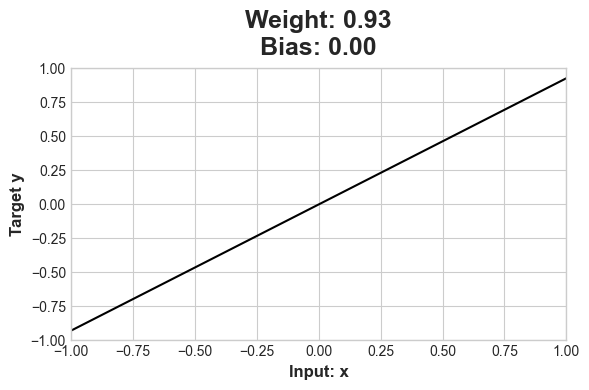

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults ############################
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
######################################################

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()